In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data:
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScience&AI\loan_prediction.csv")
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [129]:
data['Dependents'] = pd.to_numeric(data['Dependents'].replace(r'\+', '', regex=True))

In [133]:
data.to_csv('loan_prediction.csv', index=False)

In [31]:
# Fill missing values with a specific value (e.g., 0 or 'Unknown')
data.fillna(0, inplace=True)  # For numerical columns
# or
data.fillna('Unknown', inplace=True)  # For categorical columns

In [33]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [151]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
# Select only ApplicantIncome and LoanAmount columns
# M-1: select by using column names
# M-2: select by usong iloc
# M-3 : by droping unwanted columns
X=data.iloc[:,[6,8]].values
X

array([[5849.,    0.],
       [4583.,  128.],
       [3000.,   66.],
       ...,
       [8072.,  253.],
       [7583.,  187.],
       [4583.,  133.]])

**Scatter Plots**

In [19]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

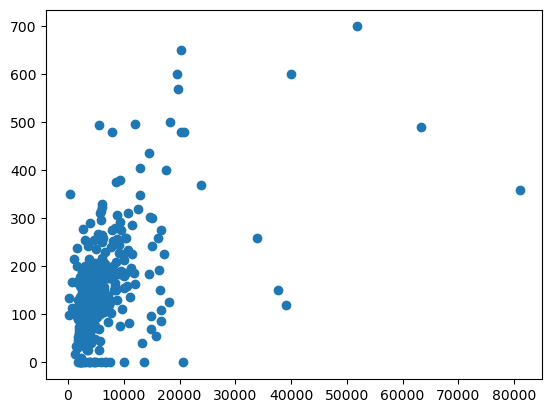

In [21]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.show()

**First we Check for one cluster to understand Within sum of squares concept**

In [23]:
from sklearn.cluster import KMeans

In [25]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

KMeans(n_clusters=1, random_state=1234)

In [157]:
X=data.iloc[:,[6,8]]

In [159]:
kmeans_1.fit(X)

KMeans(n_clusters=1, random_state=1234)

In [161]:
kmeans_1.inertia_ 

22882183065.537468

In [163]:
means=kmeans_1.cluster_centers_
means

array([[5403.45928339,  141.16612378]])

In [165]:
data['ApplicantIncome'].mean(),data['LoanAmount'].mean()

(5403.459283387622, 141.16612377850163)

In [203]:
X

array([[5849.,    0.],
       [4583.,  128.],
       [3000.,   66.],
       ...,
       [8072.,  253.],
       [7583.,  187.],
       [4583.,  133.]])

In [205]:
np.sum(np.square(X-means))

22882183065.537457

In [43]:
summ=0
for i in X.values:
    d=np.sum(np.square(i-means))
    summ=summ+d
summ

#(15-60.56)^2+(39-50.2)^2 

22882183065.537457

**Try to identify optimal clusters using elbow method**

In [45]:
import warnings

warnings.filterwarnings('ignore')

wss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))

In [47]:
wss

[22882183065.54,
 9085505900.81,
 4919572846.51,
 3052958139.47,
 1562619574.35,
 1078357656.47,
 711719173.14,
 534546266.17,
 467545478.17,
 376488230.01,
 314148716.19,
 203725780.88,
 188768961.52,
 168452960.87,
 148161160.91,
 128584044.83,
 106319476.24,
 97352572.65,
 75861063.01,
 63958672.11]

In [49]:
pd.DataFrame(zip(wss,range(1,21)))

,0,1
0,2.288218e+10,1
1,9.085506e+09,2
2,4.919573e+09,3
3,3.052958e+09,4
4,1.562620e+09,5
5,1.078358e+09,6
6,7.117192e+08,7
7,5.345463e+08,8
8,4.675455e+08,9
9,3.764882e+08,10


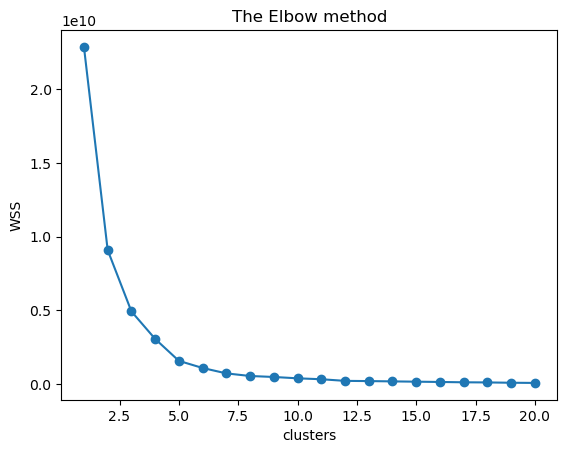

In [51]:
plt.scatter(range(1,21),wss)
plt.plot(range(1,21),wss)
plt.title("The Elbow method")
plt.xlabel("clusters")
plt.ylabel("WSS")
plt.show()

In [80]:
kmeans=KMeans(n_clusters=6,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X) # which data point belongs to which cluster
y_clusters

array([3, 3, 0, 0, 3, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 5, 3,
       0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 5, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 3,
       0, 5, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       5, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0, 5, 3, 0, 0,
       3, 0, 0, 3, 3, 2, 0, 0, 3, 5, 3, 0, 0, 0, 3, 0, 2, 0, 5, 3, 2, 0,
       0, 0, 3, 0, 3, 0, 2, 3, 3, 3, 3, 0, 5, 0, 2, 0, 5, 3, 3, 0, 5, 0,
       0, 4, 3, 5, 0, 3, 0, 5, 0, 0, 5, 0, 3, 0, 0, 5, 0, 1, 0, 3, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 4, 0, 4, 0, 0, 0, 5, 3, 5, 3, 0, 3, 0, 5, 0,
       0, 5, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 5, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 5, 3, 0, 3, 3, 3, 3, 0, 0, 0, 5, 0, 3, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 3, 5, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 2, 3, 3, 0, 0, 3,
       3, 0, 3, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 5, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0,

In [55]:
data['Cluster_group']=y_clusters

In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_group
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,3
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3


In [59]:
data['Cluster_group'].value_counts()

Cluster_group
0    350
3    171
5     60
2     26
4      4
1      3
Name: count, dtype: int64

In [61]:
data[data['Cluster_group']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_group
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,LP002961,Male,Yes,1.0,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y,0
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y,0
608,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0


**groupby**

In [63]:
data.groupby('Cluster_group')

In [65]:
list(data.groupby('Cluster_group'))

[(0,
        Loan_ID  Gender Married  Dependents     Education Self_Employed  \
  2    LP001005    Male     Yes         0.0      Graduate           Yes   
  3    LP001006    Male     Yes         0.0  Not Graduate            No   
  6    LP001013    Male     Yes         0.0  Not Graduate            No   
  7    LP001014    Male     Yes         3.0      Graduate            No   
  8    LP001018    Male     Yes         2.0      Graduate            No   
  ..        ...     ...     ...         ...           ...           ...   
  606  LP002961    Male     Yes         1.0      Graduate            No   
  607  LP002964    Male     Yes         2.0  Not Graduate            No   
  608  LP002974    Male     Yes         0.0      Graduate            No   
  609  LP002978  Female      No         0.0      Graduate            No   
  610  LP002979    Male     Yes         3.0      Graduate            No   
  
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
  2              

In [67]:
list(data.groupby('Cluster_group'))
data.groupby('Cluster_group')['Cluster_group'].count()

Cluster_group
0    350
1      3
2     26
3    171
4      4
5     60
Name: Cluster_group, dtype: int64

In [69]:
data[data['Cluster_group']==0].iloc[:,[6,8]]

,ApplicantIncome,LoanAmount
2,3000,66.0
3,2583,120.0
6,2333,95.0
7,3036,158.0
8,4006,168.0
...,...,...
606,3400,173.0
607,3987,157.0
608,3232,108.0
609,2900,71.0


In [111]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [73]:
# Group the data points
# We calcualte mean of each cluster data points
#X[X['Cluster_group']==0].iloc[:,[0,1]]
cs_1=data[data['Cluster_group']==0].iloc[:,[6,8]]
cs_2=data[data['Cluster_group']==1].iloc[:,[6,8]]
cs_3=data[data['Cluster_group']==2].iloc[:,[6,8]]
cs_4=data[data['Cluster_group']==3].iloc[:,[6,8]]
cs_5=data[data['Cluster_group']==4].iloc[:,[6,8]]
cs_6=data[data['Cluster_group']==5].iloc[:,[6,8]]
d1={'Cluster-1':cs_1.mean(),
   'Cluster-2':cs_2.mean(),
   'Cluster-3':cs_3.mean(),
   'Cluster-4':cs_4.mean(),
   'Cluster-5':cs_5.mean(),
   'Cluster-6':cs_6.mean()}
pd.DataFrame(d1)

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5,Cluster-6
ApplicantIncome,2918.880000,65366.666667,17234.615385,5415.929825,37677.75,9584.683333
LoanAmount,111.017143,516.666667,275.423077,146.017544,283.00,216.800000


In [207]:
X

array([[5849.,    0.],
       [4583.,  128.],
       [3000.,   66.],
       ...,
       [8072.,  253.],
       [7583.,  187.],
       [4583.,  133.]])

In [209]:
X[:,0]  # First column
X[:,1]  # Second column

array([  0., 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 120., 201.,  74., 106.,
       114., 320.,   0., 100., 144., 184., 110.,  80.,  47.,  75., 134.,
        96.,  88.,  44., 144., 120., 144., 100., 120., 112., 134., 286.,
        97.,  96., 135., 180., 144., 120.,  99., 165.,   0., 116., 258.,
       126., 312., 125., 136., 172.,  97.,  81.,  95., 187., 113., 176.,
       110., 180., 130., 111.,   0., 167., 265.,  50., 136.,  99., 104.,
       210., 175., 131., 188.,  81., 122.,  25.,   0., 137.,  50., 115.,
       131., 133., 151.,   0.,   0., 160., 100., 225., 120., 216.,  94.,
       136., 139., 152.,   0., 118., 185., 154.,  85., 175., 259., 180.,
        44., 137.,  81., 194.,  93., 370.,   0., 160., 182., 650.,  74.,
        70.,  25., 102., 290.,  84.,  88., 242., 129., 185., 168., 175.,
       122., 187., 100.,  70.,  30., 225., 125., 11

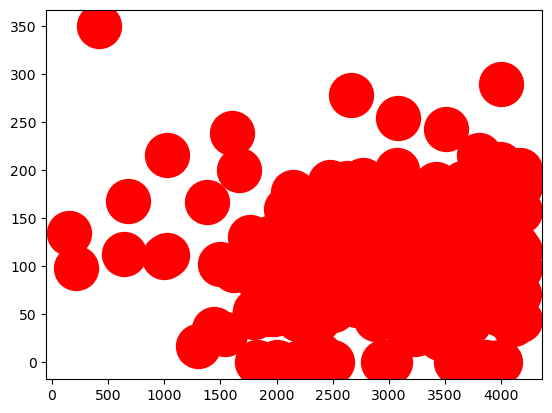

In [82]:
X[y_clusters==0] 
c1=X[y_clusters==0,0] 
c2=X[y_clusters==0,1]
plt.scatter(c1,c2,s=1000,c='red')

In [91]:
X[y_clusters==0,1]

array([ 66., 120.,  95., 158., 168.,  70., 109., 200., 114.,  17., 100.,
        76., 115., 116., 112., 151., 122.,  35., 120., 201.,  74., 114.,
         0., 100., 144., 184., 110.,  80.,  47.,  75., 134.,  88., 120.,
       144., 100., 120.,  97.,  96., 135., 144., 120.,  99., 165., 116.,
       126., 172.,  97.,  81., 113., 176., 110., 180., 130., 111.,   0.,
       167.,  50., 136.,  99., 104., 131.,  81., 122.,  25., 137.,  50.,
       131., 160., 100., 216.,  94., 139., 152., 154.,  85.,  44., 137.,
        81.,  93.,   0.,  74.,  70.,  25., 290.,  88., 122., 100.,  30.,
       152., 113.,  50., 120.,  98., 121., 158., 182., 129.,  63.,  95.,
        81., 116., 101., 116., 102.,  67., 108.,  66.,  58., 168.,  76.,
       170., 120., 113.,  90.,   0., 135., 124.,  80.,  55.,  59., 127.,
       128., 137., 100., 135., 131.,  60., 116., 144., 170., 104.,  42.,
       120., 140., 122., 112.,  96., 140., 155., 123., 123.,  90., 201.,
       138., 104., 279., 255., 134., 155., 151., 13

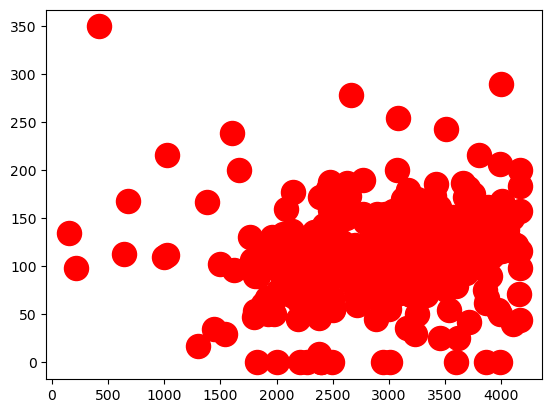

In [93]:
X=data.iloc[:,[6,8]].values
X[y_clusters==0]
len(X[y_clusters==0])
l1=X[y_clusters==0,0] 
l2=X[y_clusters==0,1] 
plt.scatter(l1,l2,s=300,c='red')

In [95]:
# sctter plot
# (Annulaincome,loanAmount)
X=data.iloc[:,[6,8]].values  # two columns 
X[y_clusters==0,0] # Cluster 0 only Annula income
X[y_clusters==0,1] # loanAmount
############################################
X[y_clusters==1,0]  # cluster=1  with first column
X[y_clusters==1,1]  # cluster=1  with second column

array([700., 490., 360.])

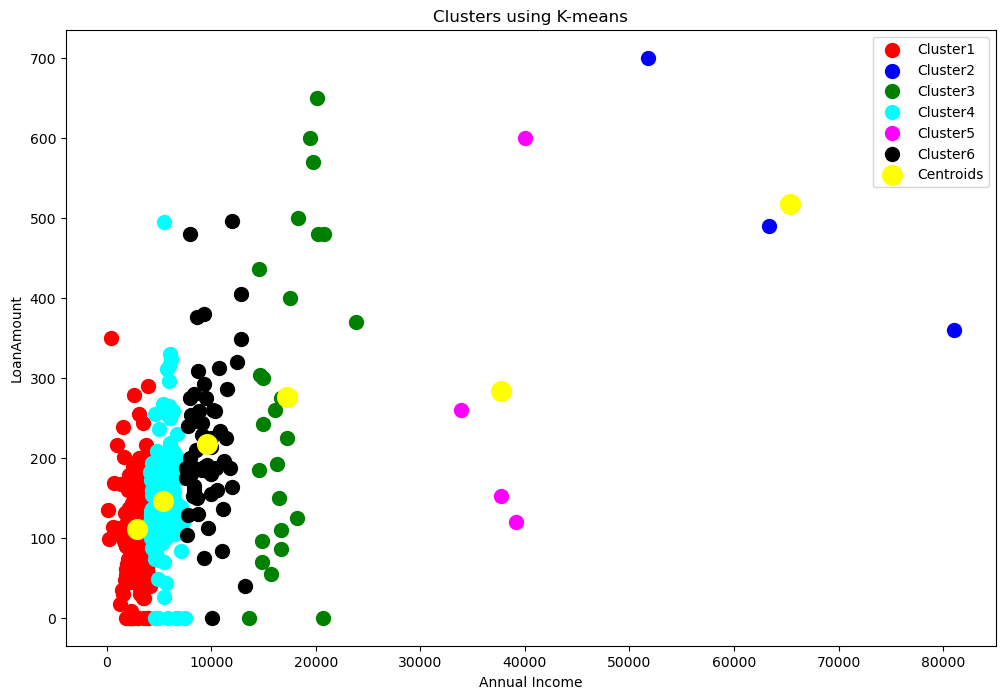

In [105]:
# Visulaize the clusters
# We are applying scatter plot between income and loanAmount w.r.t to clusters
X=data.iloc[:,[6,8]].values
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label="Cluster5")
plt.scatter(X[y_clusters==5,0],X[y_clusters==5,1],s=100,c='black',label="Cluster6")
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow',s=200,label="Centroids")
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("LoanAmount")
plt.legend()
plt.show()
# Where s will give the size of the centriod

**silhouette_score**

In [107]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScience&AI\\Loan_prediction.csv")
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [181]:
data.fillna({
    'column8': 0 }, inplace=True)

In [187]:
data.fillna(0, inplace=True) 

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data
X=data[['ApplicantIncome','LoanAmount']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans.labels_
silhouette_score(X,kmeans.labels_)

0.5891314799973064

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data
X=data[['ApplicantIncome','LoanAmount']].values
# Initialize lists to store silhouette scores for each k
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k value that maximizes silhouette score
k_values=range(2,11)
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_k)
print("Optimal silhouette score:", optimal_silhouette_score)


Optimal number of clusters: 2
Optimal silhouette score: 0.9176713084718946


In [41]:
k_values[silhouette_scores.index(max(silhouette_scores))]

2

In [43]:
np.argmax(silhouette_scores)

0

In [45]:
silhouette_scores.index(max(silhouette_scores))  # one method
print("the index of maximum value is:",np.argmax(silhouette_scores))
print("the maximum value is:",np.max(silhouette_scores))
k_values=range(2,11) # [2,3,4,5,6,7,8,9,10,11]
k_values[3]

the index of maximum value is: 0
the maximum value is: 0.9176713084718946


5

**Hierarchical Cluster**

In [49]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data
X=data.iloc[:,[6,8]].values

In [51]:
import scipy.cluster.hierarchy as sch

$Linkage Functions$

In [54]:
import scipy.cluster.hierarchy as sch
val=[[2,5],[3,6],[7,10],[12,10],[6,3],[10,20]]
sch.linkage(val)

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 4.        ,  6.        ,  4.24264069,  3.        ],
       [ 2.        ,  3.        ,  5.        ,  2.        ],
       [ 7.        ,  8.        ,  5.65685425,  5.        ],
       [ 5.        ,  9.        , 10.19803903,  6.        ]])

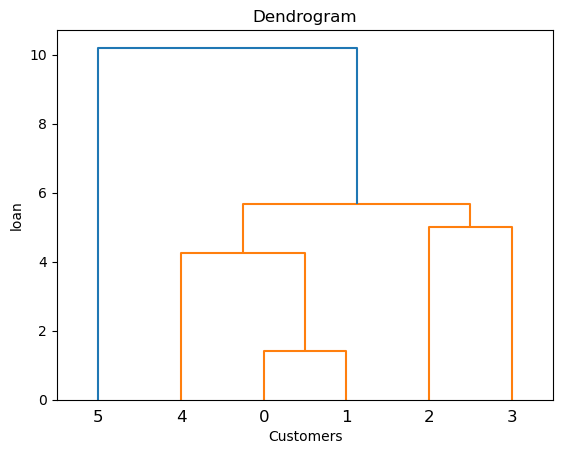

In [56]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(val,method='single'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("loan")
plt.show()

val=[[2,5],[3,6],[7,10],[12,10],[6,3],[10,20]]

In [58]:
sch.linkage(X,method='single')

array([[3.28000000e+02, 4.69000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 3.92000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.90000000e+01, 2.20000000e+01, 1.00000000e+00, 2.00000000e+00],
       ...,
       [1.71000000e+02, 3.33000000e+02, 1.15759050e+04, 2.00000000e+00],
       [1.22300000e+03, 1.22400000e+03, 1.17644250e+04, 6.13000000e+02],
       [4.09000000e+02, 1.22500000e+03, 1.76634784e+04, 6.14000000e+02]])

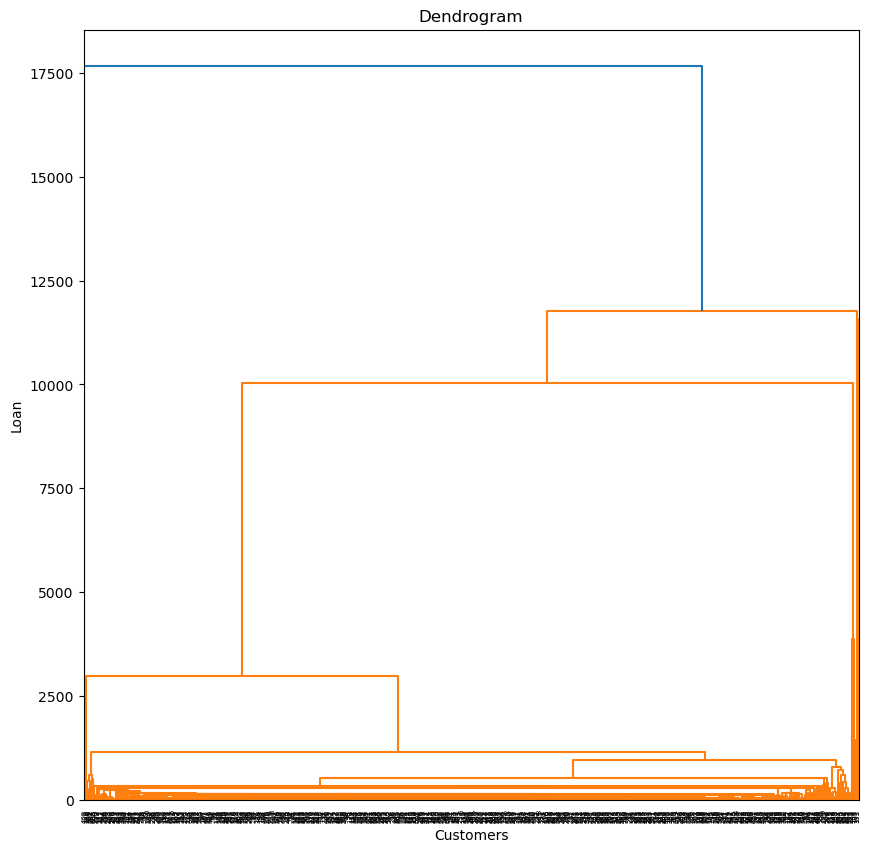

In [68]:
# Dendogram using Single
plt.figure(figsize=(10,10))
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Loan")
plt.show()

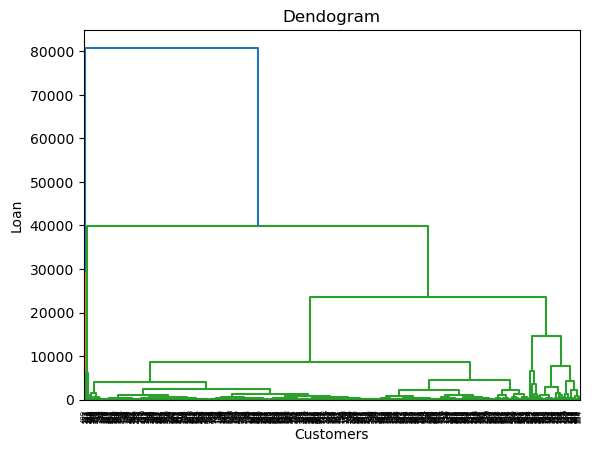

In [70]:
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Loan")
plt.show()

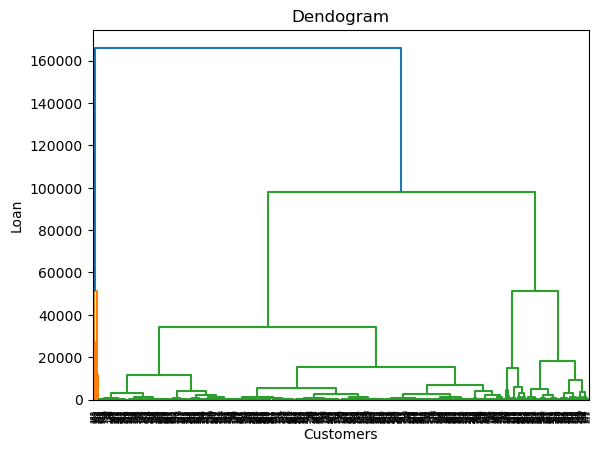

In [72]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Loan")
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
hc=AgglomerativeClustering(n_clusters=5,
                           #affinity='euclidean', # shift+tab write the correct one
                           metric='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

# Those who are getting error affinity
# metric='euclidean'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 2, 0, 4, 0, 2, 0, 0, 0, 2, 0,
       0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [84]:
y_clusters 

array([3, 3, 0, 0, 3, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 5, 3,
       0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 5, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 3,
       0, 5, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       5, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0, 5, 3, 0, 0,
       3, 0, 0, 3, 3, 2, 0, 0, 3, 5, 3, 0, 0, 0, 3, 0, 2, 0, 5, 3, 2, 0,
       0, 0, 3, 0, 3, 0, 2, 3, 3, 3, 3, 0, 5, 0, 2, 0, 5, 3, 3, 0, 5, 0,
       0, 4, 3, 5, 0, 3, 0, 5, 0, 0, 5, 0, 3, 0, 0, 5, 0, 1, 0, 3, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 4, 0, 4, 0, 0, 0, 5, 3, 5, 3, 0, 3, 0, 5, 0,
       0, 5, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 5, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 5, 3, 0, 3, 3, 3, 3, 0, 0, 0, 5, 0, 3, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 3, 5, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 2, 3, 3, 0, 0, 3,
       3, 0, 3, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 5, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0,

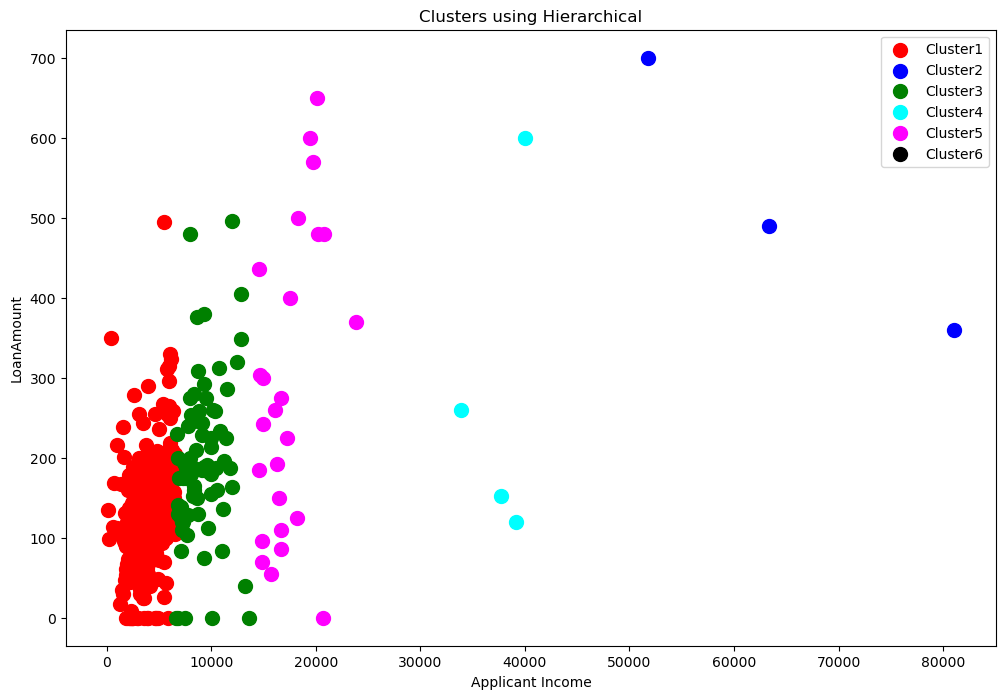

In [92]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
plt.scatter(X[y_hc==5,0],X[y_hc==5,1],s=100,c='black',label="Cluster6")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using Hierarchical")
plt.xlabel("Applicant Income")
plt.ylabel("LoanAmount")
plt.legend()
plt.show()